<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/AnaMariaSeguro/Parcial_AnaMSeguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Punto 4**

In [30]:
import numpy as np
import pandas as pd

a = 7
k = 2*(a+1)
f = [20, 40]
fs = max(f)*2 + 20
Ts = 1 / fs
t = np.arange(0, 10, Ts)

x_t = 4*np.sin(40*np.pi*t + np.pi/4) + k*np.cos(80*np.pi*t) + 5

data = {"t (s)": t, "x(t)": x_t}
muestras = pd.DataFrame(data)
muestras.head()

,t (s),x(t)
0,0.00,23.828427
1,0.01,-4.380246
2,0.02,9.318534
3,0.03,5.993519
4,0.04,-9.760234


**Punto 5**

In [12]:
def welch_periodogram(x, M, S, w):
    #Punto A)
    N = len(x)
    step = M - S
    num_segments = (N - S) // step
    Pxx_total = np.zeros(M)

    #Punto B)
    for i in range(num_segments):
        start_idx = i * step
        segment = x[start_idx:start_idx + M]
        windowed_segment = segment * w
        dft = np.fft.fft(windowed_segment, n=M)
        periodogram = (np.abs(dft) ** 2) / (M * np.sum(w ** 2)) #Punto C)
        Pxx_total += periodogram

    #Punto D)
    Pxx = Pxx_total / num_segments
    f = np.fft.fftfreq(M, d=1.0)[:M // 2]
    return f, Pxx[:M // 2]

**Punto 6**

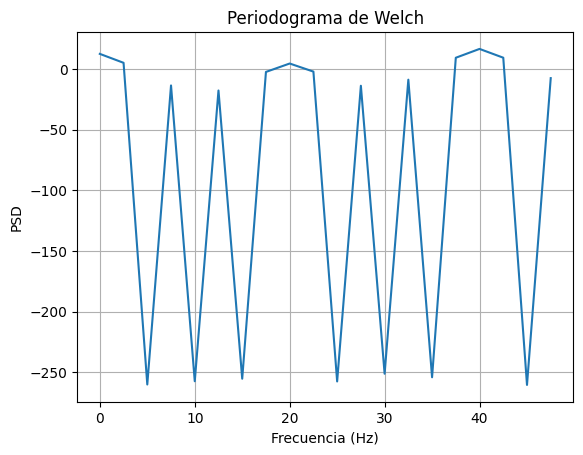

In [31]:
fs = 100
t = np.arange(0, 10, 1/fs)
x_t = 4 * np.sin(40*np.pi*t + np.pi/4) + k*np.cos(80*np.pi*t) + 5

M = 40
S = 20
w = np.bartlett(M)
f, Pxx = welch_periodogram(x, M, S, w)

plt.plot(f * fs, 10 * np.log10(Pxx))
plt.title("Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD")
plt.grid()
plt.show()

**Punto 7**

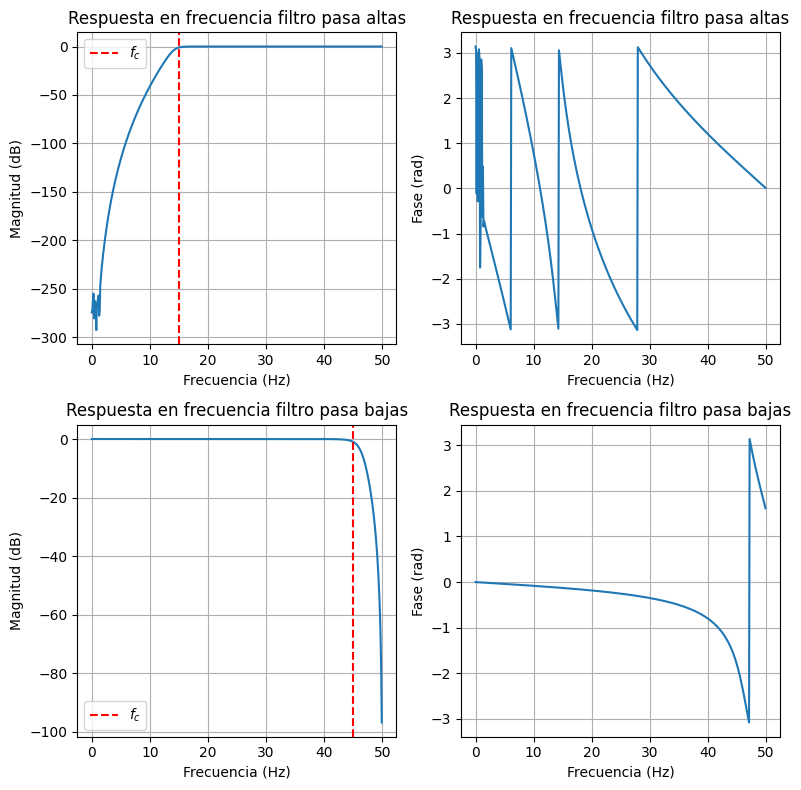

In [40]:
import scipy.signal as signal

fs = 100
nyquist = fs / 2
fc1 = 15
fc2 = 45
attenuation_highpass = 0.1  # Atenuación paso-alto (10 veces menor)
attenuation_lowpass = 0.01  # Atenuación paso-bajo (100 veces menor)

# Frecuencias normalizadas
wn1 = fc1 / nyquist
wn2 = fc2 / nyquist

#Filtro pasa altas
order_high, wn_high = signal.buttord(wp=wn1, ws=wn1 * 0.8, gpass=1, gstop=-20 * np.log10(attenuation_highpass))
b_high, a_high = signal.butter(order_high, wn_high, btype="high", analog=False)

#Filtro pasa bajas
order_low, wn_low = signal.buttord(wp=wn2, ws=wn2 * 1.1, gpass=1, gstop=-20 * np.log10(attenuation_lowpass))
b_low, a_low = signal.butter(order_low, wn_low, btype="low", analog=False)

w_high, h_high = signal.freqz(b_high, a_high, fs=fs)
w_low, h_low = signal.freqz(b_low, a_low, fs=fs)

plt.figure(figsize=(8, 8))
#Magnitud y fase de filtro pasa altas
plt.subplot(2, 2, 1)
plt.plot(w_high, 20 * np.log10(np.abs(h_high)))
plt.title("Respuesta en frecuencia filtro pasa altas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()
plt.axvline(fc1, color="r", linestyle="--", label="$f_c$")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(w_high, np.angle(h_high))
plt.title("Respuesta en frecuencia filtro pasa altas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")
plt.grid()

#Magnitud y fase de filtro pasa bajas
plt.subplot(2, 2, 3)
plt.plot(w_low, 20 * np.log10(np.abs(h_low)))
plt.title("Respuesta en frecuencia filtro pasa bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid()
plt.axvline(fc2, color="r", linestyle="--", label="$f_c$")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(w_low, np.angle(h_low))
plt.title("Respuesta en frecuencia filtro pasa bajas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (rad)")
plt.grid()

plt.tight_layout()
plt.show()